In [398]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [399]:
 #Find the 10 countries with most projects

In [400]:
#Load as Pandas dataframe
json_df=pd.read_json('data/world_bank_projects.json')
json_df.shape

(500, 50)

In [401]:
json_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [402]:
json_df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [403]:
type(json_df.columns)

pandas.core.indexes.base.Index

In [404]:
json_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [454]:
countrynames=json_df.countryname
countrynames

0      Federal Democratic Republic of Ethiopia
1                          Republic of Tunisia
2                                       Tuvalu
3                            Republic of Yemen
4                           Kingdom of Lesotho
                        ...                   
495                                    Jamaica
496           Lao People's Democratic Republic
497                         Republic of Guinea
498                      Republic of Indonesia
499                          Republic of Kenya
Name: countryname, Length: 500, dtype: object

In [407]:
unique_countrynames=json_df.countryname.unique()

In [408]:
type(unique_countrynames)

numpy.ndarray

In [409]:
type(countrynames)

pandas.core.series.Series

In [410]:
#unique_countrynames

In [411]:
unique_countrynames.size

118

In [412]:
most_proj_country=json_df.groupby('countryname')['project_name'].count()

In [413]:
most_proj_country

countryname
Africa                         11
Antigua and Barbuda             1
Arab Republic of Egypt          2
Argentine Republic              2
Bosnia and Herzegovina          1
                               ..
Union of the Comoros            3
United Mexican States           2
United Republic of Tanzania     8
West Bank and Gaza              6
World                           2
Name: project_name, Length: 118, dtype: int64

In [414]:
most_proj_country_top10=most_proj_country.sort_values(ascending=False).head(10)

In [415]:
most_proj_country_top10

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

In [416]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Countries')

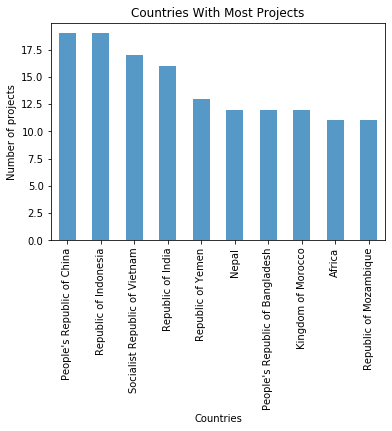

In [417]:
most_proj_country_top10.plot(kind='bar',alpha=0.75)
plt.title('Countries With Most Projects')
plt.ylabel('Number of projects')
plt.xlabel('Countries')

In [418]:
#### Q2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [419]:
json_df.shape

(500, 50)

In [420]:
type(json_df['mjtheme_namecode'])

pandas.core.series.Series

In [421]:
###trying with importing json data as string

In [422]:
json_list=json.load((open('data/world_bank_projects.json')))

In [423]:
type(json_list)

list

In [455]:
#json_list

In [425]:
#top10_proj_themes=pd.json_normalize(json_list,'mjtheme_namecode' )

In [426]:
#cleaning up data by dropping unnecessary columns

In [427]:
temp_df=json_df.drop(['project_abstract','projectfinancialtype','status','productlinetype','_id','prodlinetext','envassesmentcategorycode','approvalfy','projectdocs','lendprojectcost','ibrdcommamt','sector_namecode','grantamt','lendinginstrtype', 'sector4','boardapprovaldate','sector3','url','source','projectstatusdisplay','id','sector2', 'totalamt','sectorcode', 'sector1','lendinginstr','majorsector_percent','board_approval_month','docty','prodline','closingdate', 'totalcommamt','supplementprojectflg','idacommamt','sector' ], 1)

In [428]:
temp_df.head()

,mjtheme,impagency,project_name,mjthemecode,mjsector_namecode,countrycode,mjtheme_namecode,countryshortname,regionname,country_namecode,theme1,themecode,borrower,theme_namecode,countryname
0,[Human development],MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11","[{'code': 'EX', 'name': 'Education'}, {'code':...",ET,"[{'code': '8', 'name': 'Human development'}, {...",Ethiopia,Africa,Federal Democratic Republic of Ethiopia!$!ET,"{'Percent': 100, 'Name': 'Education for all'}",65,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia
1,"[Economic management, Social protection and ri...",MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6","[{'code': 'BX', 'name': 'Public Administration...",TN,"[{'code': '1', 'name': 'Economic management'},...",Tunisia,Middle East and North Africa,Republic of Tunisia!$!TN,"{'Percent': 30, 'Name': 'Other economic manage...","54,24",GOVERNMENT OF TUNISIA,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia
2,"[Trade and integration, Public sector governan...",MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6","[{'code': 'TX', 'name': 'Transportation'}]",TV,"[{'code': '5', 'name': 'Trade and integration'...",Tuvalu,East Asia and Pacific,Tuvalu!$!TV,"{'Percent': 46, 'Name': 'Regional integration'}","52,81,25,47",MINISTRY OF FINANCE AND ECONOMIC DEVEL,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu
3,"[Social dev/gender/inclusion, Social dev/gende...",LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7","[{'code': 'JX', 'name': 'Health and other soci...",RY,"[{'code': '7', 'name': 'Social dev/gender/incl...","Yemen, Republic of",Middle East and North Africa,Republic of Yemen!$!RY,"{'Percent': 50, 'Name': 'Participation and civ...","59,57",MIN. OF PLANNING AND INT'L COOPERATION,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen
4,"[Trade and integration, Financial and private ...",MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4","[{'code': 'YX', 'name': 'Industry and trade'},...",LS,"[{'code': '5', 'name': 'Trade and integration'...",Lesotho,Africa,Kingdom of Lesotho!$!LS,"{'Percent': 30, 'Name': 'Export development an...","41,45",MINISTRY OF FINANCE,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho


In [429]:
mjtheme_df=temp_df[['mjtheme_namecode','mjthemecode','mjtheme','country_namecode']]

In [430]:
mjtheme_df['mjtheme_namecode']

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
                             ...                        
495    [{'code': '4', 'name': 'Financial and private ...
496    [{'code': '8', 'name': 'Human development'}, {...
497    [{'code': '10', 'name': 'Rural development'}, ...
498    [{'code': '10', 'name': 'Rural development'}, ...
499    [{'code': '9', 'name': 'Urban development'}, {...
Name: mjtheme_namecode, Length: 500, dtype: object

In [431]:
json_list=json.load((open('data/world_bank_projects.json')))

In [432]:
top10_major_proj_theme=pd.json_normalize(json_list, 'mjtheme_namecode')

In [433]:
top10_major_proj_theme

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [434]:
top10_major_proj_theme.groupby('name').count()

,code
name,
,122
Economic management,33
Environment and natural resources management,223
Financial and private sector development,130
Human development,197
Public sector governance,184
Rule of law,12
Rural development,202
Social dev/gender/inclusion,119


In [435]:
#checking if the above data is indeed correct. By locating all the rows where col 'name' is 'Human development' 
#I can confirm that total row are 197 below

In [436]:
top10_major_proj_theme.loc[top10_major_proj_theme['name'] == 'Human development']

,code,name
0,8,Human development
41,8,Human development
43,8,Human development
44,8,Human development
47,8,Human development
...,...,...
1469,8,Human development
1478,8,Human development
1486,8,Human development
1489,8,Human development


In [437]:
top10_major_proj_theme

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [438]:
#grouping by name and couting the occurrences of each 'name' gives us which theme 
# is most used. sorting in decending order will show top names

In [439]:
t10_withnulls=top10_major_proj_theme.groupby('name').count()

In [440]:
t10_withnulls=t10_withnulls.sort_values('code', ascending=False).head(10)
t10_withnulls.columns=['Total Projects']
t10_withnulls

,Total Projects
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


In [441]:
####Top 10 themes are shown above with empty names of themes. 

In [442]:
# Q3:  #Create a dataframe with the missing names filled in.

In [443]:
##Create a dataframe with the missing names filled in:
#to do this (1) dreate a df with all the unique values for each name corresponding to it's code value. (df). This is done by using methof .drop_duplicates()
   # (2) reindex df to make 'code' it's index(df_code_index)
    # (3) convert df_code_index to dict using .to_dict() (df_dict_new)
    # Write a code to return item (name) from the df_dict_new if the code matches with code from df_temp 

In [444]:
df_temp=top10_major_proj_theme
df_temp

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [445]:
df=df_temp[df_temp['name'] != '']
df=df.drop_duplicates()
df

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [446]:
df_code_index=df.set_index('code')
df_code_index

,name
code,
8,Human development
1,Economic management
6,Social protection and risk management
5,Trade and integration
2,Public sector governance
11,Environment and natural resources management
7,Social dev/gender/inclusion
4,Financial and private sector development
10,Rural development


In [447]:
df_dict=df_code_index.to_dict()
df_dict
df_dict_new=df_dict['name']
df_dict_new

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [448]:
def replace_empty_name(row):
    icode= row['code']
    iname= row['name']
    for key,item in df_dict_new.items():
        if (key==icode): 
            return item
df_temp['name']= df_temp.apply(replace_empty_name,axis=1)
t10_nonulls=df_temp
t10_nonulls

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [449]:
t10_nonulls=t10_nonulls.groupby('name').count()

In [450]:
t10_nonulls=t10_nonulls.sort_values(by='code', ascending=False).head(10)
t10_nonulls.columns=['Total Projects']
t10_nonulls

,Total Projects
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


In [451]:
#The top 10 themes are shown above with empty cells filled in with previous values. 

<Figure size 432x288 with 0 Axes>

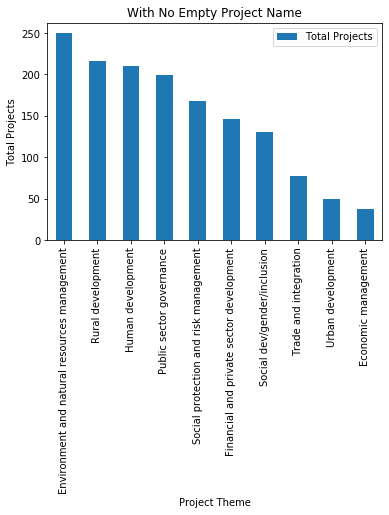

In [452]:
plt.clf()
t10_nonulls.plot(kind='bar')
plt.xlabel('Project Theme')
plt.ylabel('Total Projects')
plt.title('With No Empty Project Name')
plt.show()

Text(0.5, 1.0, 'With Project Names left Empty')

<Figure size 432x288 with 0 Axes>

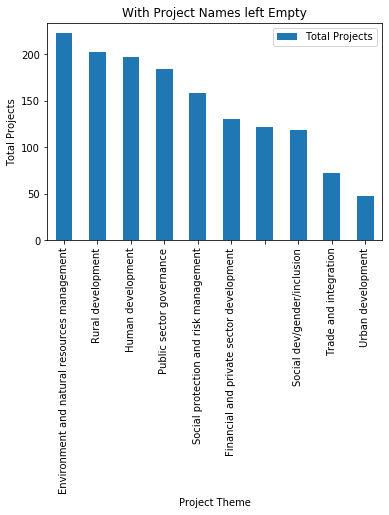

In [453]:
plt.clf()
t10_withnulls.plot(kind='bar')
plt.xlabel('Project Theme')
plt.ylabel('Total Projects')
plt.title('With Project Names left Empty')